In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

complete_csv = "cleanData/CleanFullDataSet.csv"
compl_df = pd.read_csv(complete_csv, low_memory=False)

clean_labor_csv = "cleanData/CleanLaborSet.csv"
clean_labor_df = pd.read_csv(clean_labor_csv, low_memory=False)

means_control_csv = "cleanData/CleanControlSet.csv"
means_control_df = pd.read_csv(means_control_csv, low_memory=False)


In [2]:
#extract info from df:
reduced_df = compl_df.loc[:,['gender', 'ageBroad',
       'majorityStatus','Citizenship Country','isAbduction', 'RecruiterRelationship',
       'CountryOfExploitation','Citizenship Region', 'Citizenship Sub-Region',
       'Citizenship Intermediate Region']]
reduced_df.head()

,gender,ageBroad,majorityStatus,Citizenship Country,isAbduction,RecruiterRelationship,CountryOfExploitation,Citizenship Region,Citizenship Sub-Region,Citizenship Intermediate Region
0,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
1,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
2,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
3,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
4,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America


# RECRUITER RELATIONSHIP

In [3]:
#grouping by the gender, agebroad, and recruiter relationship as test 
reduced_compare = reduced_df.groupby(["gender","ageBroad","RecruiterRelationship"])
reduced_compare["RecruiterRelationship"].count()

gender  ageBroad  RecruiterRelationship 
Female  0--8      Family/Relative             83
                  Family/Relative; Other       1
                  Friend/Acquaintance          2
                  Not Specified               37
                  Other                        5
                                            ... 
Male    9--17     unknown                   1575
        unknown   Family/Relative            123
                  Friend/Acquaintance        295
                  Other                      459
                  unknown                   2645
Name: RecruiterRelationship, Length: 159, dtype: int64

In [4]:
count_recruit = reduced_compare["RecruiterRelationship"].count()

table_df = pd.DataFrame({"Recruitement Count": count_recruit})
table_df

Recruitement Count
gender ageBroad RecruiterRelationship                     
Female 0--8     Family/Relative                         83
                Family/Relative; Other                   1
                Friend/Acquaintance                      2
                Not Specified                           37
                Other                                    5
...                                                    ...
Male   9--17    unknown                               1575
       unknown  Family/Relative                        123
                Friend/Acquaintance                    295
                Other                                  459
                unknown                               2645

[159 rows x 1 columns]

In [5]:
#breaking it down by gender
male_info = reduced_df.loc[reduced_df["gender"] == "Male"]
male_grp = male_info.groupby(["ageBroad","RecruiterRelationship"])
male_relationship = male_grp["RecruiterRelationship"].count()

male_table = pd.DataFrame({"Recruitement Count": male_relationship})
male_table = male_table.sort_values("ageBroad", ascending =True)
male_table

Recruitement Count
ageBroad RecruiterRelationship                                       
0--8     Family/Relative                                           41
         Not Specified                                             23
         Other                                                      9
         unknown                                                  642
18--20   Family/Relative                                            1
         Other                                                     15
         unknown                                                  205
21--23   Other                                                     33
         unknown                                                  422
         Friend/Acquaintance                                        7
         Not Specified; Other                                      17
24--26   Family/Relative                                            2
         Friend/Acquaintance                                       47
         Other                                                     57
         unknown                                                  542
27--29   Family/Relative                                            3
         Friend/Acquaintance                                       37
         Other                                                    103
         unknown                                                  629
30--38   unknown                                                 2206
         Other                                                    455
         Friend/Acquaintance                                      196
         Family/Relative                                           12
39--47   Family/Relative                                            3
         Friend/Acquaintance                                      109
         Other                                                    207
         unknown                                                 1136
48+      Friend/Acquaintance                                       51
         Other                                                     97
         unknown                                                  547
9--17    unknown                                                 1575
         Other                                                     21
         Not Specified                                            203
         Intimate Partner                                           5
         Family/Relative; Intimate Partner; Other                   1
         Family/Relative; Not Specified                             1
         Family/Relative                                           54
         Friend/Acquaintance                                       31
unknown  Other                                                    459
         Family/Relative                                          123
         Friend/Acquaintance                                      295
         unknown                                                 2645

In [6]:
#breaking it down by gender
female_info = reduced_df.loc[reduced_df["gender"] == "Female"]
female_grp = female_info.groupby(["ageBroad","RecruiterRelationship"])
female_relationship = female_grp["RecruiterRelationship"].count()

female_table = pd.DataFrame({"Recruitement Count": female_relationship})
female_table = female_table.sort_values("ageBroad", ascending =True)
female_table

Recruitement Count
ageBroad RecruiterRelationship                     
0--8     Family/Relative                         83
         Family/Relative; Other                   1
         Friend/Acquaintance                      2
         Not Specified                           37
         Other                                    5
...                                             ...
unknown  Other                                 1135
         Family/Relative                        593
         Friend/Acquaintance                    672
         Intimate Partner                         1
         unknown                               6425

[117 rows x 1 columns]

ANOTHER APPROACH FROM RECRUITMENT DATA

In [7]:
compl_df.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [8]:
#looking at each column instead of recruiterrelationships
recruitment_data = compl_df.loc[:,['gender', 'ageBroad', 'majorityStatus','isAbduction', 'RecruiterRelationship',
       'CountryOfExploitation', 'recruiterRelationIntimatePartner',
       'recruiterRelationFriend', 'recruiterRelationFamily',
       'recruiterRelationOther', 'recruiterRelationUnknown', 'Exploit Country','Citizenship Country' ]]

In [9]:
#grouping by age
recruit_mthod = recruitment_data.groupby("ageBroad")
rr_partner = recruit_mthod['recruiterRelationIntimatePartner'].sum()
rr_friend = recruit_mthod['recruiterRelationFriend'].sum()
rr_family = recruit_mthod['recruiterRelationFamily'].sum()
rr_other = recruit_mthod['recruiterRelationOther'].sum()
rr_unkown = recruit_mthod['recruiterRelationUnknown'].sum()
rr_abdctn = recruit_mthod['isAbduction'].sum()


In [64]:
#creating data based on the sum of the recruitment value

rr_df = pd.DataFrame({"Intimate Partner": rr_partner, "Friend": rr_friend,
                      "Family" : rr_family,
                      "Other": rr_other, "Unknown" :rr_unkown, 
                      "Abduction": rr_abdctn})

rr_df


,Intimate Partner,Friend,Family,Other,Unknown,Abduction
ageBroad,,,,,,
0--8,0,2,125,15,1415,0
18--20,335,121,112,187,3734,13
21--23,241,98,82,208,3629,0
24--26,200,100,37,231,2933,0
27--29,129,63,39,253,2178,0
30--38,266,279,107,910,5633,0
39--47,66,132,34,413,2273,0
48+,30,78,22,248,1245,0
9--17,357,256,605,421,7108,26


In [11]:
#create bar graphs with multiple bars.. 

In [65]:
x_value = ["0-8","18-20","21-23","24-26","27-29","30-38","39-47","48+","09-17","unknown"]

rr_df["Age Group"] = x_value

rr_df = rr_df[["Age Group", "Intimate Partner",
               "Friend", "Family", "Other",
              "Unknown", "Abduction"]]

rr_df

,Age Group,Intimate Partner,Friend,Family,Other,Unknown,Abduction
ageBroad,,,,,,,
0--8,0-8,0,2,125,15,1415,0
18--20,18-20,335,121,112,187,3734,13
21--23,21-23,241,98,82,208,3629,0
24--26,24-26,200,100,37,231,2933,0
27--29,27-29,129,63,39,253,2178,0
30--38,30-38,266,279,107,910,5633,0
39--47,39-47,66,132,34,413,2273,0
48+,48+,30,78,22,248,1245,0
9--17,09-17,357,256,605,421,7108,26


In [66]:
rr_df = rr_df.reset_index()
rr_df = rr_df.sort_values(by=["Age Group"], ascending= True)
rr_df

,ageBroad,Age Group,Intimate Partner,Friend,Family,Other,Unknown,Abduction
0,0--8,0-8,0,2,125,15,1415,0
8,9--17,09-17,357,256,605,421,7108,26
1,18--20,18-20,335,121,112,187,3734,13
2,21--23,21-23,241,98,82,208,3629,0
3,24--26,24-26,200,100,37,231,2933,0
4,27--29,27-29,129,63,39,253,2178,0
5,30--38,30-38,266,279,107,910,5633,0
6,39--47,39-47,66,132,34,413,2273,0
7,48+,48+,30,78,22,248,1245,0
9,unknown,unknown,1,967,716,1594,9059,0


In [67]:
#dropping the unknown data
rr_df2 = rr_df.drop(9)
rr_df2

,ageBroad,Age Group,Intimate Partner,Friend,Family,Other,Unknown,Abduction
0,0--8,0-8,0,2,125,15,1415,0
8,9--17,09-17,357,256,605,421,7108,26
1,18--20,18-20,335,121,112,187,3734,13
2,21--23,21-23,241,98,82,208,3629,0
3,24--26,24-26,200,100,37,231,2933,0
4,27--29,27-29,129,63,39,253,2178,0
5,30--38,30-38,266,279,107,910,5633,0
6,39--47,39-47,66,132,34,413,2273,0
7,48+,48+,30,78,22,248,1245,0


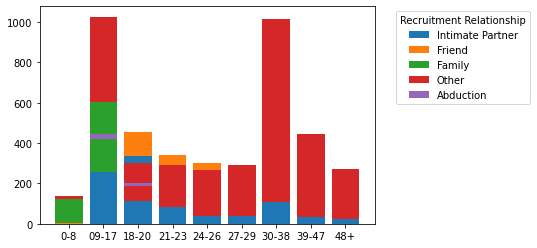

In [68]:
#okay but still looks like an eye sore
x_value = rr_df2["Age Group"]
int_prtnr = rr_df2["Intimate Partner"]
friend = rr_df2["Friend"]
family = rr_df2["Family"]
other = rr_df2["Other"]
abdctn = rr_df2["Abduction"]
plt.bar(x_value, int_prtnr ,label='Intimate Partner')
plt.bar(x_value, friend,bottom=int_prtnr, label="Friend")
plt.bar(x_value, family, bottom=friend, label= "Family")
plt.bar(x_value, other, bottom=family, label="Other")
plt.bar(x_value,abdctn, bottom=other, label = "Abduction")

plt.legend(title= "Recruitment Relationship", bbox_to_anchor=(1.05, 1))


#need to work on the theme of the plots to match it with group
#need to add values on the legend

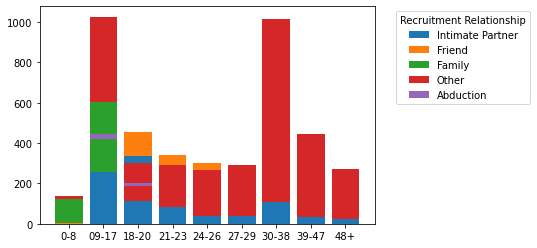

In [69]:
#okay but still looks like an eye sore
x_value = rr_df2["Age Group"]
int_prtnr = rr_df2["Intimate Partner"]
friend = rr_df2["Friend"]
family = rr_df2["Family"]
other = rr_df2["Other"]
abdctn = rr_df2["Abduction"]
plt.bar(x_value, int_prtnr ,label='Intimate Partner')
plt.bar(x_value, friend,bottom=int_prtnr, label="Friend")
plt.bar(x_value, family, bottom=friend, label= "Family")
plt.bar(x_value, other, bottom=family, label="Other")
plt.bar(x_value,abdctn, bottom=other, label = "Abduction")

plt.legend(title= "Recruitment Relationship", bbox_to_anchor=(1.05, 1))


#need to work on the theme of the plots to match it with group
#need to add values on the legend

In [103]:
rr_df_test = rr_df2.drop(columns=["Unknown"])



rr_df_test = rr_df_test.reset_index()
rr_df_test =rr_df_test.drop(columns=["index"])
rr_df_test = rr_df_test.set_index("Age Group")
rr_df_test = rr_df_test.drop(columns=["ageBroad"])

rr_df_test

,Intimate Partner,Friend,Family,Other,Abduction
Age Group,,,,,
0-8,0,2,125,15,0
09-17,357,256,605,421,26
18-20,335,121,112,187,13
21-23,241,98,82,208,0
24-26,200,100,37,231,0
27-29,129,63,39,253,0
30-38,266,279,107,910,0
39-47,66,132,34,413,0
48+,30,78,22,248,0


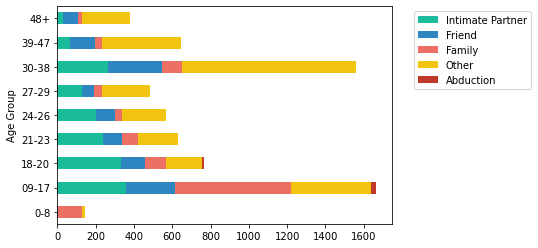

In [126]:

# x = list(rr_df_test["Age Group"])
color =['#1ABC9C', '#2E86C1', '#EC7063', '#F1C40F', '#C0392B']
rr_df_test.plot(kind="barh",stacked=True, color= color)
plt.legend(bbox_to_anchor=(1.05, 1))


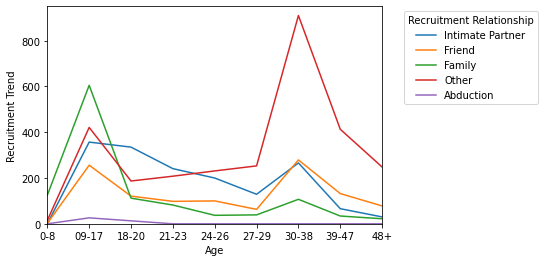

In [40]:
#plot seems to convey more of the message on trend
x_value = rr_df2["Age Group"]
int_prtnr = rr_df2["Recruitment Relationship: Intimate Partner"]
friend = rr_df2["Recruitment Relationship: Friend"]
family = rr_df2["Recruitment Relationship: Family"]
other = rr_df2["Recruitment Relationship: Other"]
abdctn = rr_df2["Recruitment Relationship: Abduction"]
plt.plot(x_value, int_prtnr,label='Intimate Partner')
plt.plot(x_value, friend,label="Friend")
plt.plot(x_value, family,label= "Family")
plt.plot(x_value, other, label="Other")
plt.plot(x_value,abdctn, label = "Abduction")
plt.ylabel("Recruitment Trend")
plt.xlabel("Age")
plt.xlim(0,8)
plt.ylim(0,950)
plt.legend(title= "Recruitment Relationship", bbox_to_anchor=(1.05, 1))




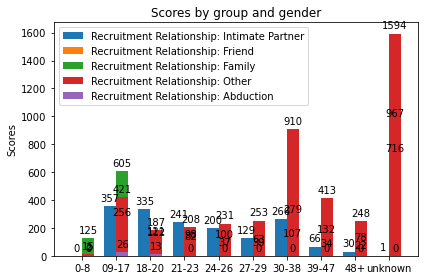

In [17]:
#JUST A PILE OF MESS WHEN LOOKING AT THE GRAPH 
labels =  rr_df["Age Group"]
intimate_partner = rr_df["Recruitment Relationship: Intimate Partner"]
friend = rr_df["Recruitment Relationship: Friend"]
family = rr_df["Recruitment Relationship: Family"]
other = rr_df["Recruitment Relationship: Other"]
# unknown = rr_df["Recruitment Relationship: Unknown"]
abduction = rr_df["Recruitment Relationship: Abduction"]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, intimate_partner, width, label="Recruitment Relationship: Intimate Partner")
rects2 = ax.bar(x + width/2, friend, width, label="Recruitment Relationship: Friend")
rects3 = ax.bar(x + width/2, family, width, label="Recruitment Relationship: Family")
rects4 = ax.bar(x + width/2, other, width, label="Recruitment Relationship: Other")
# rects5 = ax.bar(x + width/2, unknown, width, label="Recruitment Relationship: Unknown")
rects6 = ax.bar(x + width/2, abduction, width, label="Recruitment Relationship: Abduction")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
# autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

# MEANS OF CONTROL


In [18]:
#moc = means of control df 
moc_df = compl_df.loc[:,['gender', 'ageBroad', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'Citizenship Country','Exploit Country' ]]
moc_df.head()

,gender,ageBroad,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,...,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,Citizenship Country,Exploit Country
0,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
1,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
2,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
3,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
4,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown


In [19]:
#means of control sum by age
#this code can be cleaned up by just doing moc_age.sum()
moc_age = moc_df.groupby("ageBroad")
moc_debtbondage = moc_age["meansOfControlDebtBondage"].sum()
moc_takeearnings = moc_age['meansOfControlTakesEarnings'].sum()
moc_rstrct_fin_acc = moc_age['meansOfControlRestrictsFinancialAccess'].sum()
moc_threat= moc_age['meansOfControlThreats'].sum()
moc_psychabuse = moc_age['meansOfControlPsychologicalAbuse'].sum()
moc_physabuse = moc_age['meansOfControlPhysicalAbuse'].sum()
moc_sexualabuse= moc_age['meansOfControlSexualAbuse'].sum()
moc_flseprmse = moc_age['meansOfControlFalsePromises'].sum()
moc_drugabuse = moc_age['meansOfControlPsychoactiveSubstances'].sum()
moc_rstrct_mvmnt = moc_age['meansOfControlRestrictsMovement'].sum()
moc_rstrct_medcare = moc_age['meansOfControlRestrictsMedicalCare'].sum()
moc_excsv_wrkhrs = moc_age['meansOfControlExcessiveWorkingHours'].sum()
moc_usechldrn = moc_age['meansOfControlUsesChildren'].sum()
moc_lawenfcrment = moc_age['meansOfControlThreatOfLawEnforcement'].sum()
moc_wthhldneccsty = moc_age['meansOfControlWithholdsNecessities'].sum()
moc_wthlddoc = moc_age['meansOfControlWithholdsDocuments'].sum()
moc_others = moc_age['meansOfControlOther'].sum()
moc_unknown = moc_age['meansOfControlNotSpecified'].sum()

In [20]:
sum_all = moc_age.sum()

In [21]:
#creating a datafrom from the all the sums variables
moc_table = pd.DataFrame({"Debt Bondage" : moc_debtbondage, "Earning Control" : moc_takeearnings,
                         "Restrict Financial Access": moc_rstrct_fin_acc, "Threats": moc_threat,
                         "Psychological Abuse" : moc_psychabuse, "Physical Abuse": moc_physabuse,
                         "Sexual Abuse": moc_sexualabuse, "False Promise": moc_flseprmse,
                          "Psychoactive Substace": moc_drugabuse, "Restrict Movement": moc_rstrct_mvmnt,
                         "Restrict Medical Care": moc_rstrct_medcare,"Excessive Working Hrs": moc_excsv_wrkhrs,
                         "Control Using Children": moc_usechldrn, "Threat of Law Enforcement": moc_lawenfcrment,
                         "Withhold Necessities": moc_wthhldneccsty, "Withhold Documents": moc_wthlddoc,
                         "Others": moc_others, "Not Specified" : moc_unknown})
moc_table

,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substace,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others,Not Specified
ageBroad,,,,,,,,,,,,,,,,,,
0--8,0,4,0,37,88,38,45,32,5,19,2,1,2,0,3,0,13,1381
18--20,112,202,30,442,534,489,211,133,362,575,39,42,13,26,121,91,368,3031
21--23,143,290,14,474,514,484,210,213,328,531,87,148,24,86,128,160,269,3050
24--26,219,348,18,490,513,457,206,320,262,546,174,225,19,116,195,249,226,2421
27--29,137,266,14,375,373,324,116,243,166,383,131,189,18,96,109,217,142,1890
30--38,353,925,27,1003,1152,770,224,936,325,1091,474,847,33,277,417,838,289,5114
39--47,119,379,4,313,392,252,68,369,82,365,199,384,3,91,165,292,103,2122
48+,73,219,1,198,256,163,37,218,43,190,151,215,3,65,75,182,27,1220
9--17,88,143,8,630,1020,644,471,199,709,688,26,106,5,22,156,14,353,5870


In [22]:
#sum of moc
moc_age = moc_df
moc_debtbondage = moc_age["meansOfControlDebtBondage"].sum()
moc_takeearnings = moc_age['meansOfControlTakesEarnings'].sum()
moc_rstrct_fin_acc = moc_age['meansOfControlRestrictsFinancialAccess'].sum()
moc_threat= moc_age['meansOfControlThreats'].sum()
moc_psychabuse = moc_age['meansOfControlPsychologicalAbuse'].sum()
moc_physabuse = moc_age['meansOfControlPhysicalAbuse'].sum()
moc_sexualabuse= moc_age['meansOfControlSexualAbuse'].sum()
moc_flseprmse = moc_age['meansOfControlFalsePromises'].sum()
moc_drugabuse = moc_age['meansOfControlPsychoactiveSubstances'].sum()
moc_rstrct_mvmnt = moc_age['meansOfControlRestrictsMovement'].sum()
moc_rstrct_medcare = moc_age['meansOfControlRestrictsMedicalCare'].sum()
moc_excsv_wrkhrs = moc_age['meansOfControlExcessiveWorkingHours'].sum()
moc_usechldrn = moc_age['meansOfControlUsesChildren'].sum()
moc_lawenfcrment = moc_age['meansOfControlThreatOfLawEnforcement'].sum()
moc_wthhldneccsty = moc_age['meansOfControlWithholdsNecessities'].sum()
moc_wthlddoc = moc_age['meansOfControlWithholdsDocuments'].sum()
moc_others = moc_age['meansOfControlOther'].sum()
moc_unknown = moc_age['meansOfControlNotSpecified'].sum()

In [23]:
#Total Sum of MEANS OF CONTROL
moc_sum_df = pd.DataFrame({"Blank": [0],"Debt Bondage" : moc_debtbondage, "Earning Control" : moc_takeearnings,
                         "Restrict Financial Access": moc_rstrct_fin_acc, "Threats": moc_threat,
                         "Psychological Abuse" : moc_psychabuse, "Physical Abuse": moc_physabuse,
                         "Sexual Abuse": moc_sexualabuse, "False Promise": moc_flseprmse,
                          "Psychoactive Substace": moc_drugabuse, "Restrict Movement": moc_rstrct_mvmnt,
                         "Restrict Medical Care": moc_rstrct_medcare,"Excessive Working Hrs": moc_excsv_wrkhrs,
                         "Control Using Children": moc_usechldrn, "Threat of Law Enforcement": moc_lawenfcrment,
                         "Withhold Necessities": moc_wthhldneccsty, "Withhold Documents": moc_wthlddoc,
                         "Others": moc_others, "Not Specified" : moc_unknown})
moc_sum_df

,Blank,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substace,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others,Not Specified
0,0,1281,2776,116,3972,4845,3632,1594,2756,2282,4415,1283,2157,120,779,1369,2076,1873,26592


In [24]:
moc_sum_df = moc_sum_df.drop(columns=['Blank'])
moc_sum_df

,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substace,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others,Not Specified
0,1281,2776,116,3972,4845,3632,1594,2756,2282,4415,1283,2157,120,779,1369,2076,1873,26592


In [25]:
moc_gender_df = compl_df.loc[:,['gender', 'ageBroad', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'Citizenship Country','Exploit Country' ]]

In [26]:
moc_gender_df.groupby("gender")

In [27]:
#sum of moc
moc_gender = moc_gender_df.groupby("gender")
moc_debtbondage = moc_gender["meansOfControlDebtBondage"].sum()
moc_takeearnings = moc_gender['meansOfControlTakesEarnings'].sum()
moc_rstrct_fin_acc = moc_gender['meansOfControlRestrictsFinancialAccess'].sum()
moc_threat= moc_gender['meansOfControlThreats'].sum()
moc_psychabuse = moc_gender['meansOfControlPsychologicalAbuse'].sum()
moc_physabuse = moc_gender['meansOfControlPhysicalAbuse'].sum()
moc_sexualabuse= moc_gender['meansOfControlSexualAbuse'].sum()
moc_flseprmse = moc_gender['meansOfControlFalsePromises'].sum()
moc_drugabuse = moc_gender['meansOfControlPsychoactiveSubstances'].sum()
moc_rstrct_mvmnt = moc_gender['meansOfControlRestrictsMovement'].sum()
moc_rstrct_medcare = moc_gender['meansOfControlRestrictsMedicalCare'].sum()
moc_excsv_wrkhrs = moc_gender['meansOfControlExcessiveWorkingHours'].sum()
moc_usechldrn = moc_gender['meansOfControlUsesChildren'].sum()
moc_lawenfcrment = moc_gender['meansOfControlThreatOfLawEnforcement'].sum()
moc_wthhldneccsty = moc_gender['meansOfControlWithholdsNecessities'].sum()
moc_wthlddoc = moc_gender['meansOfControlWithholdsDocuments'].sum()
moc_others = moc_gender['meansOfControlOther'].sum()
moc_unknown = moc_gender['meansOfControlNotSpecified'].sum()

In [28]:


moc_gender_sum_df = pd.DataFrame({"Debt Bondage" : moc_debtbondage, "Earning Control" : moc_takeearnings,
                         "Restrict Financial Access": moc_rstrct_fin_acc, "Threats": moc_threat,
                         "Psychological Abuse" : moc_psychabuse, "Physical Abuse": moc_physabuse,
                         "Sexual Abuse": moc_sexualabuse, "False Promise": moc_flseprmse,
                          "Psychoactive Substance": moc_drugabuse, "Restrict Movement": moc_rstrct_mvmnt,
                         "Restrict Medical Care": moc_rstrct_medcare,"Excessive Working Hrs": moc_excsv_wrkhrs,
                         "Control Using Children": moc_usechldrn, "Threat of Law Enforcement": moc_lawenfcrment,
                         "Withhold Necessities": moc_wthhldneccsty, "Withhold Documents": moc_wthlddoc,
                         "Others": moc_others, "Not Specified" : moc_unknown})

moc_gender_sum_df.drop(columns = ["Not Specified"])

# moc_gender_sum_df = moc_gender_sum_df.reset_index()
# moc_gender_sum_df

,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substance,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others
gender,,,,,,,,,,,,,,,,,
Female,828,1444,116,2941,3549,2982,1548,1353,2224,3231,582,856,117,389,798,1024,1762
Male,453,1332,0,1031,1296,650,46,1403,58,1184,701,1301,3,390,571,1052,111


In [42]:
sum_of_abuse = moc_gender_sum_df["Physical Abuse"] + moc_gender_sum_df["Psychological Abuse"] + moc_gender_sum_df["Sexual Abuse"]  + moc_gender_sum_df["Threats"]              
sum_of_finance = moc_gender_sum_df["Debt Bondage"] + moc_gender_sum_df["Restrict Financial Access"] + moc_gender_sum_df["Excessive Working Hrs"] + moc_gender_sum_df["Earning Control"]
sum_withold = moc_gender_sum_df["Withhold Documents"] + moc_gender_sum_df["Withhold Necessities"] + moc_gender_sum_df["Restrict Medical Care"] + moc_gender_sum_df["Control Using Children"]


moc_gender_sum_df["Abused"] = sum_of_abuse
moc_gender_sum_df["Financial Control"] = sum_of_finance
moc_gender_sum_df["Withhold Essentials"] = sum_withold
moc_gender_sum_df.columns

Index(['Debt Bondage', 'Earning Control', 'Restrict Financial Access',
       'Threats', 'Psychological Abuse', 'Physical Abuse', 'Sexual Abuse',
       'False Promise', 'Psychoactive Substance', 'Restrict Movement',
       'Restrict Medical Care', 'Excessive Working Hrs',
       'Control Using Children', 'Threat of Law Enforcement',
       'Withhold Necessities', 'Withhold Documents', 'Others', 'Not Specified',
       'Abused', 'Financial Control', 'Withhold', 'Withhold Essential',
       'Withhold Essentials'],
      dtype='object')

In [43]:
moc_gender_sum_df2 = moc_gender_sum_df[["Financial Control", "Abused", "False Promise", "Psychoactive Substance", "Withhold Essentials", "Restrict Movement",
                                        "Threat of Law Enforcement", "Others"]]

In [44]:
moc_gender_sum_df2

,Financial Control,Abused,False Promise,Psychoactive Substance,Withhold Essentials,Restrict Movement,Threat of Law Enforcement,Others
gender,,,,,,,,
Female,3244,11020,1353,2224,2521,3231,389,1762
Male,3086,3023,1403,58,2327,1184,390,111


Text(0, 0.5, 'Means of Control')

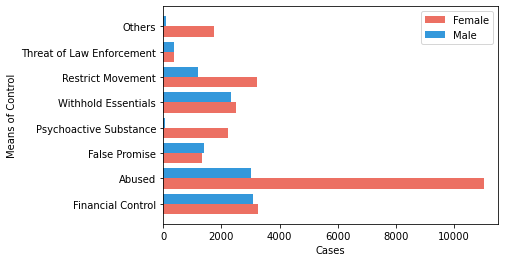

In [131]:
labels = list(moc_gender_sum_df2.columns)
y_female = list(np.array(moc_gender_sum_df2)[0])
y_male = list(np.array(moc_gender_sum_df2)[1])

w = 0.4
# len_label =list(range(len(moc_gender_sum_df2.columns)))
bar1 = np.arange(len(labels))


plt.barh(bar1, y_female, w, label = "Female", color = "#EC7063")
plt.barh(bar1+w, y_male, w, label = "Male", color = "#3498DB")
plt.yticks(bar1 + w/2,labels)
plt.legend()
plt.xlabel("Cases")
plt.xlim(0,11500)
plt.ylabel("Means of Control")


In [33]:
# labels = list(moc_gender_sum_df2.columns)
# y_female = list(np.array(moc_gender_sum_df2)[0])
# y_male = list(np.array(moc_gender_sum_df2)[1])

# x = np.arange(len(labels))
# width = 0.35

# fig, ax = plt.subplots()
# g1 = ax.bar(x-width/2, y_female, width, label = "Female")
# g2 = ax.bar(x+width/2, y_male, width, label = "Male")

# ax.set_ylabel("Total Means of Control")
# ax.set_xlabel(labels)

# def autolabel(g):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for q in g:
#         height = q.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(q.get_x() + q.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()

# plt.show()

#  COUNTRY OF ORIGIN

In [34]:
origin_df = compl_df.loc[:,['gender', 'ageBroad',
       'majorityStatus','Citizenship Country',
       'CountryOfExploitation','Citizenship Region', 'Citizenship Sub-Region',
       'Citizenship Intermediate Region']]

In [35]:
country_origin = origin_df.groupby(["gender",'Citizenship Country'])
country_count = country_origin['Citizenship Country'].count()

bycitizen_df = pd.DataFrame({"Trafficking Size" : country_count})
bycitizen_df

Trafficking Size
gender Citizenship Country                               
Female Albania                                         22
       Belarus                                        523
       Bolivia (Plurinational State of)                18
       Bulgaria                                       342
       Cambodia                                       922
...                                                   ...
Male   Uganda                                          26
       Ukraine                                       3649
       United States of America                        26
       Uzbekistan                                      82
       unknown                                        400

[65 rows x 1 columns]

In [36]:
male_citzenship = origin_df.loc[origin_df["gender"] == "Male"]

male_origin = male_citzenship.groupby(['Citizenship Country'])
male_count = male_origin['Citizenship Country'].count()

male_origin_df = pd.DataFrame({"Trafficking Size" : male_count})
male_origin_df

,Trafficking Size
Citizenship Country,
Afghanistan,97
Bangladesh,11
Belarus,940
Burkina Faso,33
Cambodia,1057
Colombia,15
Côte d’Ivoire,31
Democratic Republic of the Congo,28
Eritrea,13


In [37]:
female_citzenship = origin_df.loc[origin_df["gender"] == "Female"]

female_origin = female_citzenship.groupby(['Citizenship Country'])
female_count = female_origin['Citizenship Country'].count()

female_origin_df = pd.DataFrame({"Trafficking Size" : female_count})
female_origin_df

,Trafficking Size
Citizenship Country,
Albania,22
Belarus,523
Bolivia (Plurinational State of),18
Bulgaria,342
Cambodia,922
China,23
Colombia,109
Democratic Republic of the Congo,25
Ghana,207
